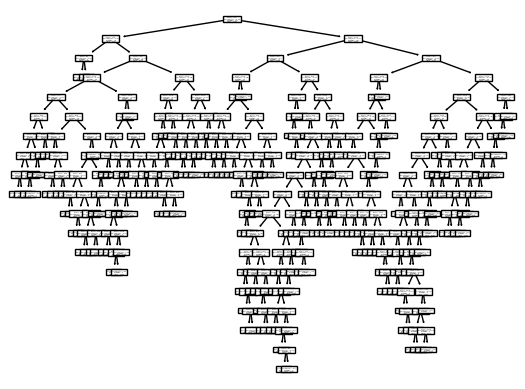

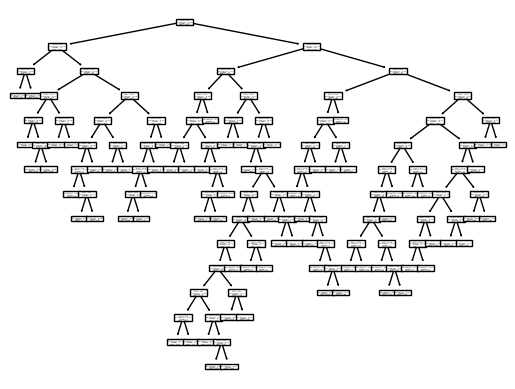

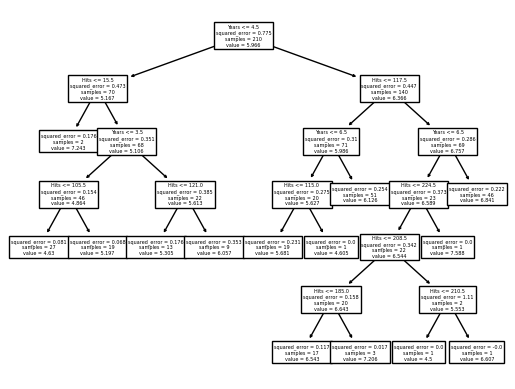

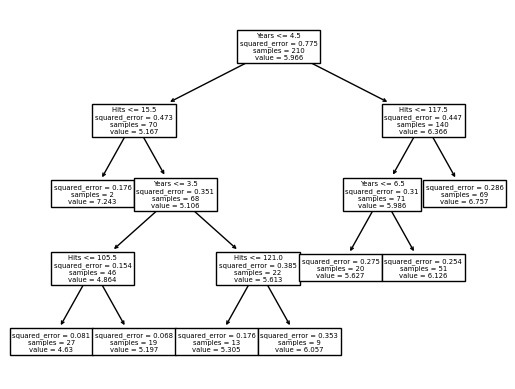

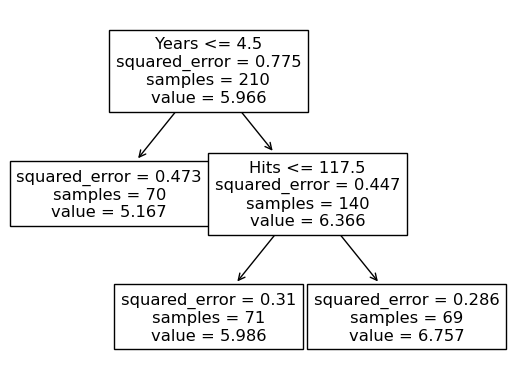

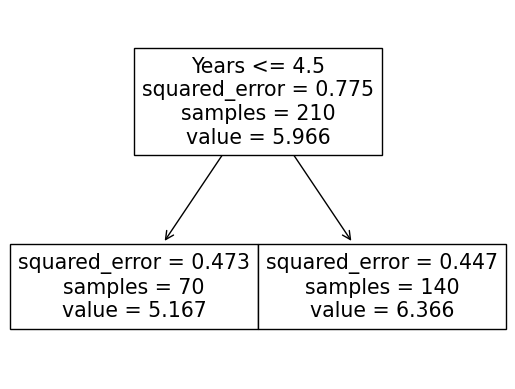

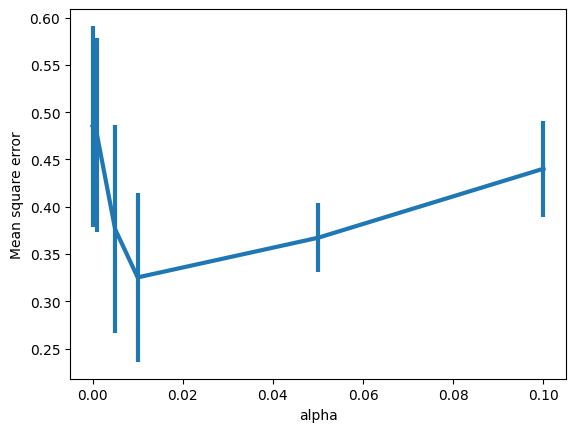

In [3]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
from ISLP import load_data
Hitters = load_data("Hitters").dropna()
X = Hitters[['Hits', 'Years']].values # Features
y = np.log(Hitters['Salary']).values # Response variable
ccp_range = [0,0.001,0.005,0.01,0.05,0.1]
kf = KFold(n_splits=5)
mse = []; std_error = []
for ccp in ccp_range:
    temp = []; plotted = False
    for train,test in kf.split(X):
        model = DecisionTreeRegressor(ccp_alpha=ccp)
        model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        temp.append(mean_squared_error(y[test],ypred))
        if not plotted:
            plot_tree(model,feature_names=['Hits','Years'])
            plotted=True
            plt.show()
    mse.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
plt.errorbar(ccp_range,mse,yerr=std_error,linewidth=3)
plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.show()

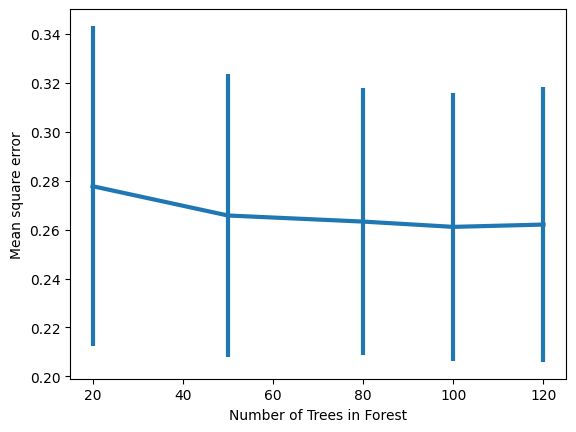

In [6]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
from ISLP import load_data

Hitters = load_data("Hitters").dropna()
X = Hitters[['Hits','Years','Runs','Walks','AtBat','Assists']].values # Features
y = np.log(Hitters['Salary']).values # Response variable

n_trees = [20,50,80,100,120]
kf = KFold(n_splits=5)
mse = []; std_error = []
for n in n_trees:
    temp = []
    for train,test in kf.split(X):
        model = RandomForestRegressor(n_estimators=n, random_state=43, max_features="sqrt")
        model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        temp.append(mean_squared_error(y[test], ypred))
    mse.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())

plt.errorbar(n_trees, mse, yerr=std_error, linewidth=3)
plt.xlabel('Number of Trees in Forest')
plt.ylabel('Mean square error')
plt.show()
